In [1]:
import os
# --- A FONTOS JAVÍTÁS ---
# Ezeket a parancsokat KELL legelöl futtatni, MINDEN import előtt.
os.environ["TF_KERAS_DISABLE_LOGGING"] = "1"
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
os.environ["TF_USE_LEGACY_KERAS"] = "1"
os.environ["KERAS_BACKEND"] = "tensorflow"
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"
os.environ["TF_DISABLE_MLIR_SERIALIZATION"] = "1"
os.environ["TF_KERAS_DISABLE_LOGGING"] = "1"

import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input

In [2]:
import tensorflow as tf
import numpy as np

print(f"TensorFlow Verzió: {tf.__version__}")
print(f"NumPy Verzió: {np.__version__}")
print("-" * 40)

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Ez a kulcsfontosságú új sor:
        # Állítsd be a "memory growth"-ot IGAZ-ra az összes GPU-n
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"Sikeresen beállítva a 'memory growth' {len(gpus)} db GPU-n.")
        
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(f"Logikai GPU-k száma: {len(logical_gpus)}")
    except RuntimeError as e:
        # Hiba történt a beállítás során
        print(e)
else:
    print("!!! FIGYELEM: A TENSORFLOW NEM ÉSZLELT EGYETLEN GPU-T SEM !!!")

print("-" * 40)

TensorFlow Verzió: 2.10.0
NumPy Verzió: 1.26.4
----------------------------------------
Sikeresen beállítva a 'memory growth' 1 db GPU-n.
Logikai GPU-k száma: 1
----------------------------------------


In [3]:
BASE_DIR = 'images/'
names = [
"Boldogko_Castle",
"Buda_Castle",
"Budapest_Museum_of_Applied_Arts",
"Budapest_University_of_Technology_and_Economics",
"Chain_Bridge_(Budapest)",
"Csesznek_Castle",
"Debrecen_Reformed_Great_Church",
"Diosgyor_Castle",
"Edeleny_L’Huillier_Coburg_Castle",
"Eger_Castle",
"Esztergom_Castle",
"Esztergom_Cathedral",
"Fertod_Esterhazy_Castle",
"Fisherman's_Bastion",
"Füzer_Castle",
"Fuzerradvany_Karolyi_Castle",
"Gellért_Baths",
"Godollo_Grassalkovich_Castle",
"Great_Synagogue_in_Dohány_Street",
"Gyula_Castle",
"Heroes'_Square_(Budapest)",
"Heviz_Thermal_Lake",
"Holloko_Castle",
"Hortobagy_Nine_Hole_Bridge",
"Hungarian_Parliament_Building",
"Hungarian_State_Opera_House",
"Jak_Church",
"Jurisics_Castle",
"Keszthely_Festetics_Palace",
"Kinizsi_Castle",
"Lillafured_Palace_Hotel",
"Mako_Hagymatikum",
"Martonvasar_Brunszvik_Castle",
"Matthias_Church_(Budapest)",
"Nadasdladany_Nadasy_Castle",
"New_York_Palace_(Budapest)",
"Pecs_Mosque",
"Rakoczi_Castle",
"Simontornya_Castle",
"Siofok_Water_Tower",
"Sirok_Castle",
"St._Stephen's_Basilica_(Budapest)",
"Sumeg_Castle",
"Szabadkigyos_Wenckheim_Castle",
"Szeged_Cathedral",
"Szigliget_Castle",
"Tata_Castle",
"Thury_Castle",
"Tiszadob_Andrassy_Castle",
"Tura_Schossberger_Castle",
"Vajdahunyad_Castle_(Budapest)",
"Visegrad_Castle"
]

tf.random.set_seed(1)

In [4]:
batch_size = 32
img_height = 256
img_width = 256

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    'images/',
    subset="training",
    validation_split=0.2,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    seed=123,
)

Found 2828 files belonging to 52 classes.
Using 2263 files for training.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    'images/',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2828 files belonging to 52 classes.
Using 565 files for validation.


In [7]:
class_names = names
print(class_names)

['Boldogko_Castle', 'Buda_Castle', 'Budapest_Museum_of_Applied_Arts', 'Budapest_University_of_Technology_and_Economics', 'Chain_Bridge_(Budapest)', 'Csesznek_Castle', 'Debrecen_Reformed_Great_Church', 'Diosgyor_Castle', 'Edeleny_L’Huillier_Coburg_Castle', 'Eger_Castle', 'Esztergom_Castle', 'Esztergom_Cathedral', 'Fertod_Esterhazy_Castle', "Fisherman's_Bastion", 'Füzer_Castle', 'Fuzerradvany_Karolyi_Castle', 'Gellért_Baths', 'Godollo_Grassalkovich_Castle', 'Great_Synagogue_in_Dohány_Street', 'Gyula_Castle', "Heroes'_Square_(Budapest)", 'Heviz_Thermal_Lake', 'Holloko_Castle', 'Hortobagy_Nine_Hole_Bridge', 'Hungarian_Parliament_Building', 'Hungarian_State_Opera_House', 'Jak_Church', 'Jurisics_Castle', 'Keszthely_Festetics_Palace', 'Kinizsi_Castle', 'Lillafured_Palace_Hotel', 'Mako_Hagymatikum', 'Martonvasar_Brunszvik_Castle', 'Matthias_Church_(Budapest)', 'Nadasdladany_Nadasy_Castle', 'New_York_Palace_(Budapest)', 'Pecs_Mosque', 'Rakoczi_Castle', 'Simontornya_Castle', 'Siofok_Water_Tower'

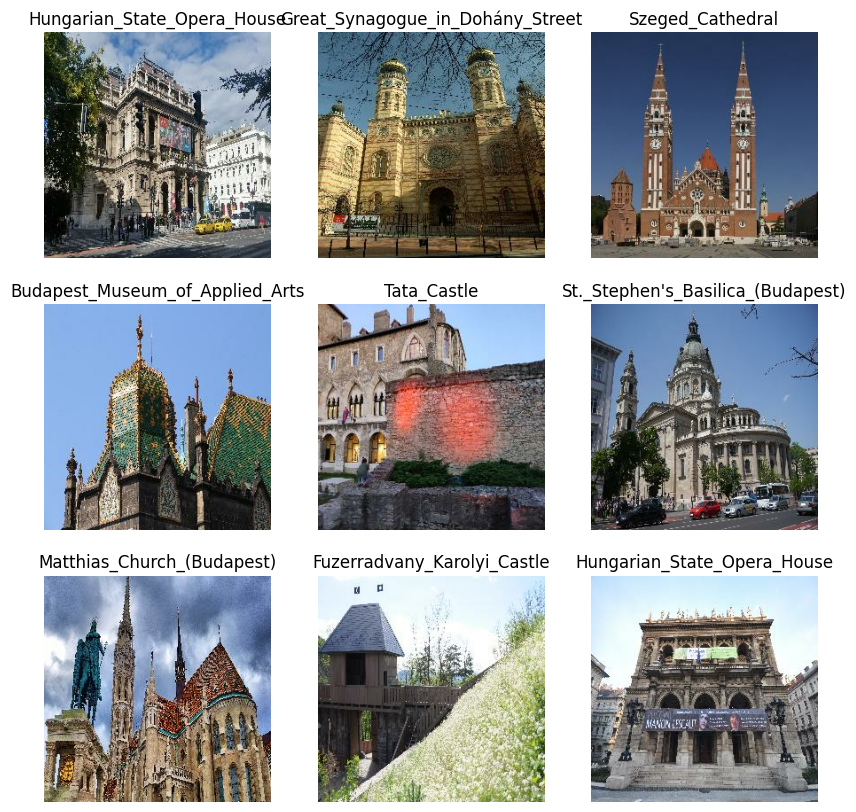

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [9]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 256, 256, 3)
(32,)


In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.shuffle(1000).prefetch(buffer_size=AUTOTUNE)

val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

In [11]:
preprocess_layer = keras.layers.Lambda(preprocess_input)

In [12]:
num_classes = len(class_names) # Ez 52 lesz, ami helyes

data_augmentation = keras.Sequential([
    layers.RandomZoom(0.15),
    layers.RandomBrightness(factor=0.2),
    layers.RandomContrast(0.2),
    layers.RandomTranslation(0.05, 0.05)
])


base_model = EfficientNetB0(
    include_top=False,  
    input_shape=(256, 256, 3),
    weights='imagenet'  
)

base_model.trainable = False

inputs = keras.Input(shape=(256, 256, 3))
x = data_augmentation(inputs)
x = preprocess_layer(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(num_classes)(x) 

model = keras.Model(inputs, outputs)

In [13]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 lambda (Lambda)             (None, 256, 256, 3)       0         
                                                                 
 efficientnetb0 (Functional)  (None, 8, 8, 1280)       4049571   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                             

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    filepath='best_model.h5',
    save_best_only=True,
    monitor='val_loss',
    mode='min'
)

callbacks = [early_stop, checkpoint]

def strip_logs(callback):
    if hasattr(callback, "on_epoch_end"):
        old = callback.on_epoch_end

        def wrapped(epoch, logs=None):
            old(epoch, {})
        callback.on_epoch_end = wrapped

original_fit = keras.Model.fit

def patched_fit(self, *args, **kwargs):
    cbs = kwargs.get("callbacks", [])
    for cb in cbs:
        strip_logs(cb)

    if "callbacks" in kwargs:
        kwargs["callbacks"] = cbs

    return original_fit(self, *args, **kwargs)

keras.Model.fit = patched_fit


history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=callbacks
)

base_model.trainable = True
for layer in base_model.layers[:-20]: 
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    metrics=['accuracy']
)

fine_tune_history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20, 
    callbacks=callbacks,
    initial_epoch=history.epoch[-1] 
)

Epoch 1/10
71/71 [==============================] - 82s 933ms/step - loss: 3.2765 - accuracy: 0.1975 - val_loss: 2.3701 - val_accuracy: 0.4018
Epoch 2/10
71/71 [==============================] - 69s 956ms/step - loss: 2.2549 - accuracy: 0.4043 - val_loss: 1.8639 - val_accuracy: 0.4956
Epoch 3/10
71/71 [==============================] - 71s 980ms/step - loss: 1.8405 - accuracy: 0.5029 - val_loss: 1.6310 - val_accuracy: 0.5558
Epoch 4/10
71/71 [==============================] - 73s 1s/step - loss: 1.5230 - accuracy: 0.5674 - val_loss: 1.4929 - val_accuracy: 0.5858
Epoch 5/10
71/71 [==============================] - 74s 1s/step - loss: 1.3577 - accuracy: 0.6191 - val_loss: 1.3790 - val_accuracy: 0.6142
Epoch 6/10
71/71 [==============================] - 76s 1s/step - loss: 1.2282 - accuracy: 0.6443 - val_loss: 1.3290 - val_accuracy: 0.6106
Epoch 7/10
71/71 [==============================] - 78s 1s/step - loss: 1.1001 - accuracy: 0.6814 - val_loss: 1.2670 - val_accuracy: 0.6549
Epoch 8/10


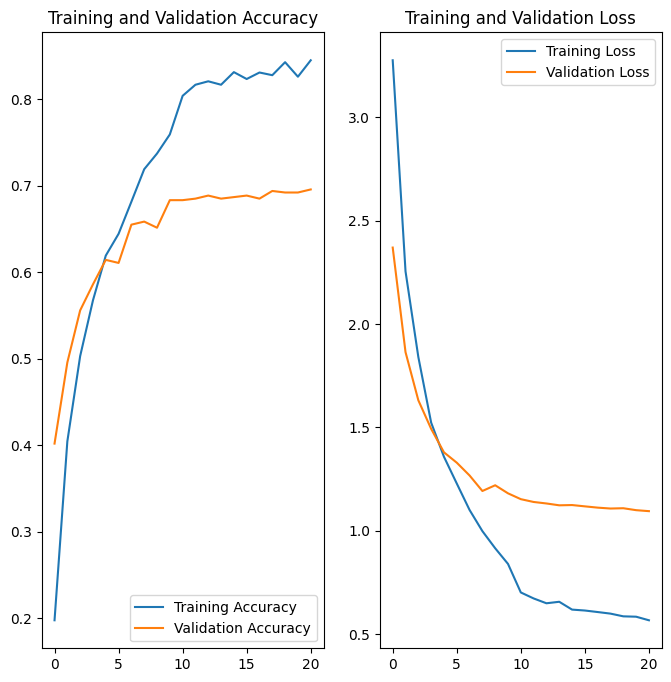

In [16]:
acc = history.history['accuracy'] + fine_tune_history.history['accuracy']
val_acc = history.history['val_accuracy'] + fine_tune_history.history['val_accuracy']
loss = history.history['loss'] + fine_tune_history.history['loss']
val_loss = history.history['val_loss'] + fine_tune_history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
budacastle = "C://Users//HP//Downloads//3.jpg"

img = tf.keras.utils.load_img(
    budacastle, target_size=(256, 256)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence. {}"
    .format(names[np.argmax(score)], 100 * np.max(score), score)
)

1/1 [==============================] - 0s 52ms/step
This image most likely belongs to Hungarian_Parliament_Building with a 72.54 percent confidence. [3.46103036e-07 1.40406203e-03 1.83640129e-03 1.62018351e-02
 2.21988539e-05 1.34557399e-06 2.84992828e-04 1.47680330e-05
 4.99545167e-05 3.55055954e-06 4.40124932e-05 3.94318595e-05
 5.70776640e-03 3.03503592e-02 7.35913709e-05 8.83611222e-07
 1.96507219e-02 4.31618319e-05 3.43948510e-03 1.54569034e-06
 1.65049394e-03 2.91043816e-05 3.71875672e-07 4.82318001e-07
 7.25392282e-01 1.38978921e-02 5.51759294e-05 9.96100539e-07
 4.44149831e-04 6.62051170e-05 8.02124268e-04 1.19266135e-03
 1.67801281e-05 1.42521188e-01 4.94548760e-04 3.52407666e-03
 1.27720041e-03 2.30928731e-06 6.03925037e-06 3.67742687e-05
 2.83203281e-06 1.90687589e-02 5.78534673e-06 6.05105997e-05
 9.29874647e-03 3.36757375e-06 5.39260782e-06 1.36969775e-05
 4.41367010e-05 3.56864839e-05 8.72893026e-04 6.91420291e-06]


In [22]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model_nonaug.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpps1_t7ek\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpps1_t7ek\assets


In [24]:
model.save_weights("landmark_model_final.weights.h5")

In [29]:
with open("model4.tflite", "wb") as f:
    f.write(tflite_model)

In [26]:
from tflite_support import metadata as _metadata

displayer = _metadata.MetadataDisplayer.with_model_file(export_model_path)
export_json_file = os.path.join(FLAGS.export_directory,
                                os.path.splitext(model_basename)[0] + ".json")
json_file = displayer.get_metadata_json()
# Optional: write out the metadata as a json file
with open(export_json_file, "w") as f:
  f.write(json_file)

ModuleNotFoundError: No module named 'tflite_support'

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model4.tflite', 'wb') as f:
  f.write(tflite_model)